In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.utils import simple_preprocess

In [102]:
import string
import pickle
import re

## Data Prep

In [230]:
merged_df = pd.read_csv('output/responses/final_df.csv', low_memory=False)

In [231]:
restaurants_and_reviews = merged_df.copy()

In [232]:
restaurant_reviews = restaurants_and_reviews.filter(items=['name', 'main_rating',
       'address', 'link', 'review_photos', 'cuisine', 'latitude', 'longitude', 'review_text'])

In [233]:
combined_reviews = restaurant_reviews.groupby(['name', 'main_rating', 'address', 'link', 'review_photos', 'cuisine',
       'latitude', 'longitude'])['review_text'].apply(list).reset_index()

In [214]:
combined_reviews.iloc[0]['review_text']

['Absolutely delicious Indian non-veg set with a very generous portion. Service was friendly, fast and efficient. Redeemed a MealPal lunch, super experience here   only restaurant so far with a QR code displayed prominently.',
 'The food was much better than I had before.  The curries were less spicy as I expected it to be a little more spicy. The naan I must say is probably one of the best I have had. Thin and chewy with a light crispy finish. Can be very packed during lunch time.',
 'Pretty good bistro bar',
 'Nice good food and good vibe.',
 'Good food, excellent vibe, reasonable prices, friendly service.',
 'Had a great evening with friends, friendly staff and tasty food.',
 'the Ideal place for a good Indian lunch set in CBD. Value for money and taste.',
 'Reasonably priced meals and drinks make it an excellent venue for social gatherings. From 12 p.m. till midnight, happy hours are in effect  To give you an idea of the prices, ,as of March 2024, a pint of Sapporo costs $12, while

In [234]:
combined_reviews.columns

Index(['name', 'main_rating', 'address', 'link', 'review_photos', 'cuisine',
       'latitude', 'longitude', 'review_text'],
      dtype='object')

# Ignore below!

In [67]:
# Remove numbers
combined_reviews['review_text_processed'] = combined_reviews['review_text'].apply(
    lambda reviews: [''.join(char for char in review if not char.isdigit()) for review in reviews]
)

In [68]:
combined_reviews.iloc[0]['review_text_processed']

['Absolutely delicious Indian non-veg set with a very generous portion. Service was friendly, fast and efficient. Redeemed a MealPal lunch, super experience here   only restaurant so far with a QR code displayed prominently.',
 'The food was much better than I had before.  The curries were less spicy as I expected it to be a little more spicy. The naan I must say is probably one of the best I have had. Thin and chewy with a light crispy finish. Can be very packed during lunch time.',
 'Pretty good bistro bar',
 'Nice good food and good vibe.',
 'Good food, excellent vibe, reasonable prices, friendly service.',
 'Had a great evening with friends, friendly staff and tasty food.',
 'the Ideal place for a good Indian lunch set in CBD. Value for money and taste.',
 'Reasonably priced meals and drinks make it an excellent venue for social gatherings. From  p.m. till midnight, happy hours are in effect  To give you an idea of the prices, ,as of March , a pint of Sapporo costs $, while a doubl

In [69]:
# Remove punctuation by replacing it with spaces
def replace_punctuation_with_space(text):
    return text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))

combined_reviews['review_text_processed'] = combined_reviews['review_text_processed'].apply(
    lambda reviews: [replace_punctuation_with_space(review) for review in reviews]
)

In [73]:
combined_reviews.iloc[0]['review_text_processed']

['Absolutely delicious Indian non veg set with a very generous portion  Service was friendly  fast and efficient  Redeemed a MealPal lunch  super experience here   only restaurant so far with a QR code displayed prominently',
 'The food was much better than I had before   The curries were less spicy as I expected it to be a little more spicy  The naan I must say is probably one of the best I have had  Thin and chewy with a light crispy finish  Can be very packed during lunch time',
 'Pretty good bistro bar',
 'Nice good food and good vibe',
 'Good food  excellent vibe  reasonable prices  friendly service',
 'Had a great evening with friends  friendly staff and tasty food',
 'the Ideal place for a good Indian lunch set in CBD  Value for money and taste',
 'Reasonably priced meals and drinks make it an excellent venue for social gatherings  From  p m  till midnight  happy hours are in effect  To give you an idea of the prices   as of March   a pint of Sapporo costs    while a double is  

In [72]:
# Strip trailing spaces
combined_reviews['review_text_processed'] = combined_reviews['review_text_processed'].apply(
    lambda reviews: [review.strip() for review in reviews]
)

In [74]:
# Convert to lowercase and then tokenize each sentence
combined_reviews['review_text_processed'] = combined_reviews['review_text_processed'].apply(
    lambda reviews: [word_tokenize(review.lower()) for review in reviews]
)

In [75]:
combined_reviews.iloc[0]['review_text_processed']

[['absolutely',
  'delicious',
  'indian',
  'non',
  'veg',
  'set',
  'with',
  'a',
  'very',
  'generous',
  'portion',
  'service',
  'was',
  'friendly',
  'fast',
  'and',
  'efficient',
  'redeemed',
  'a',
  'mealpal',
  'lunch',
  'super',
  'experience',
  'here',
  'only',
  'restaurant',
  'so',
  'far',
  'with',
  'a',
  'qr',
  'code',
  'displayed',
  'prominently'],
 ['the',
  'food',
  'was',
  'much',
  'better',
  'than',
  'i',
  'had',
  'before',
  'the',
  'curries',
  'were',
  'less',
  'spicy',
  'as',
  'i',
  'expected',
  'it',
  'to',
  'be',
  'a',
  'little',
  'more',
  'spicy',
  'the',
  'naan',
  'i',
  'must',
  'say',
  'is',
  'probably',
  'one',
  'of',
  'the',
  'best',
  'i',
  'have',
  'had',
  'thin',
  'and',
  'chewy',
  'with',
  'a',
  'light',
  'crispy',
  'finish',
  'can',
  'be',
  'very',
  'packed',
  'during',
  'lunch',
  'time'],
 ['pretty', 'good', 'bistro', 'bar'],
 ['nice', 'good', 'food', 'and', 'good', 'vibe'],
 ['good

In [83]:
combined_reviews.iloc[2000]['review_text_processed']

['really',
 'good',
 'food',
 'good',
 'service',
 'out',
 'of',
 'this',
 'world',
 'was',
 'a',
 'pleasant',
 'experience',
 'thank',
 'you',
 'you',
 'have',
 'changed',
 'my',
 'life',
 'food',
 'was',
 'good',
 'especially',
 'the',
 'ultraman',
 'chicken',
 'fun',
 'nice',
 'and',
 'worth',
 'it',
 'food',
 'was',
 'good',
 'ultraman',
 'chicken',
 'was',
 'good',
 'ultra',
 'man',
 'chicken',
 'was',
 'damn',
 'nice',
 'worth',
 'it',
 'family',
 'and',
 'relaxed',
 'ambience',
 'parking',
 'parking',
 'is',
 'not',
 'an',
 'issue',
 'food',
 'liver',
 'porridge',
 'fried',
 'dumpling',
 'are',
 'good',
 'hor',
 'fun',
 'has',
 'wok',
 'hei',
 'but',
 'a',
 'bit',
 'salty',
 'perfect',
 'venue',
 'for',
 'lunch',
 'salted',
 'egg',
 'chicken',
 'is',
 'excellent',
 'per',
 'pax',
 'all',
 'ok',
 'except',
 'for',
 'the',
 'coffee',
 'ribs',
 'not',
 'crispy',
 'not',
 'recommended',
 'good',
 'environment',
 'nice',
 'place',
 'nice',
 'food',
 'value',
 'for',
 'money',
 'very'

In [82]:
# Flatten the list
combined_reviews['review_text_processed'] = combined_reviews['review_text_processed'].apply(
    lambda reviews: [word for review in reviews for word in review]
)

In [78]:
# Set stop words
stop_words = set(stopwords.words('english'))

In [79]:
STOPWORDS = [('food', 407452),
 ('good', 248393),
 ('service', 217139),
 ('great', 138171),
 ('staff', 117568),
 ('nice', 110294),
 ('place', 108332),
 ('restaurant', 86786),
 ('dish', 84913),
 ('time', 78530),
 ('delicious', 78503),
 ('friendly', 73322),
 ('really', 72500),
 ('u', 66628),
 ('taste', 65326),
 ('also', 61263),
 ('experience', 61009),
 ('like', 60406),
 ('one', 57355),
 ('back', 56299)]

In [80]:
# Add our custom stopwords
custom_stopwords = set([word[0] for word in STOPWORDS])
stop_words.update(custom_stopwords)

In [84]:
# Remove stop words
combined_reviews['review_text_processed'] = combined_reviews['review_text_processed'].apply(lambda x: [w for w in x if not w in stop_words])

In [14]:
# Lemmatize
# lemmatizer = WordNetLemmatizer()
# combined_reviews['review_text_processed'] = combined_reviews['review_text_processed'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

In [85]:
combined_reviews.iloc[2000]['review_text_processed']

['world',
 'pleasant',
 'thank',
 'changed',
 'life',
 'especially',
 'ultraman',
 'chicken',
 'fun',
 'worth',
 'ultraman',
 'chicken',
 'ultra',
 'man',
 'chicken',
 'damn',
 'worth',
 'family',
 'relaxed',
 'ambience',
 'parking',
 'parking',
 'issue',
 'liver',
 'porridge',
 'fried',
 'dumpling',
 'hor',
 'fun',
 'wok',
 'hei',
 'bit',
 'salty',
 'perfect',
 'venue',
 'lunch',
 'salted',
 'egg',
 'chicken',
 'excellent',
 'per',
 'pax',
 'ok',
 'except',
 'coffee',
 'ribs',
 'crispy',
 'recommended',
 'environment',
 'value',
 'money',
 'came',
 'department',
 'lunch',
 'traditional',
 'chinese',
 'fair',
 'tasted',
 'recommend',
 'claypot',
 'liver',
 'curry',
 'fish',
 'head',
 'ultraman',
 'chicken',
 'bbq',
 'squid',
 'green',
 'dragon',
 'beansprout',
 'coffee',
 'pork',
 'rib',
 'cereal',
 'prawn',
 'omelette',
 'fuyong',
 'salad',
 'yutiow',
 'ok',
 'ambience',
 'large',
 'gatherings',
 'free',
 'parking',
 'located',
 'within',
 'compound',
 'total',
 'almost',
 'us',
 'foo

In [147]:
tokens = combined_reviews['review_text'].apply(lambda reviews: [''.join(char for char in review if not char.isdigit()) for review in reviews])

In [160]:
pattern = re.compile(f"[{re.escape(string.punctuation)}]")
p_tokens = [([pattern.sub(' ', char) for char in review]) for review in tokens]

In [174]:
s_tokens = [[" ".join(list(review))] for review in p_tokens]

In [176]:
ss_tokens = [[char.lower() for char in review] for review in s_tokens]

In [178]:
w_tokens = [[word_tokenize(word) for word in review] for review in ss_tokens]

In [181]:
f_tokens = [token for sublist in w_tokens for token in sublist]

In [ ]:
sss_tokens = [[word for word in review if word not in stop_words] for review in f_tokens]

# Run Cells from Here Only!

#### Data Processing

In [235]:
# Set stop words
stop_words = set(stopwords.words('english'))
# Add our custom stopwords
STOPWORDS = [('food', 407452),
 ('good', 248393),
 ('service', 217139),
 ('great', 138171),
 ('staff', 117568),
 ('nice', 110294),
 ('place', 108332),
 ('restaurant', 86786),
 ('dish', 84913),
 ('time', 78530),
 ('delicious', 78503),
 ('friendly', 73322),
 ('really', 72500),
 ('u', 66628),
 ('taste', 65326),
 ('also', 61263),
 ('experience', 61009),
 ('like', 60406),
 ('one', 57355),
 ('back', 56299)]
custom_stopwords = set([word[0] for word in STOPWORDS])
stop_words.update(custom_stopwords)

In [236]:
def data_processing(df):
    # Remove numbers
    tokens = df['review_text'].apply(lambda reviews: [''.join(char for char in review if not char.isdigit()) for review in reviews])
    # Remove punctuation by replacing it with spaces
    pattern = re.compile(f"[{re.escape(string.punctuation)}]")
    tokens = [([pattern.sub(' ', char) for char in review]) for review in tokens]
    # Join all the sentences
    tokens = [[" ".join(list(review))] for review in tokens]
    # Convert to lower case
    tokens = [[char.lower() for char in review] for review in tokens]
    # Tokenize
    tokens = [[word_tokenize(word) for word in review] for review in tokens]
    # Flatten
    tokens = [token for sublist in tokens for token in sublist]
    # Remove stop words
    tokens = [[word for word in review if word not in stop_words] for review in tokens]
    return tokens

In [237]:
tokens = data_processing(combined_reviews)

In [240]:
tokens[2]

['coffee',
 'highest',
 'quality',
 'smooth',
 'intense',
 'without',
 'hint',
 'bitterness',
 'way',
 'attention',
 'addicting',
 'coffee',
 'coffee',
 'minutes',
 'waiting',
 'coffee',
 'coffee',
 'tastes',
 'use',
 'medium',
 'roasted',
 'seeds',
 'havent',
 'drunk',
 'long',
 'eat',
 'toast',
 'extremely',
 'bread',
 'tastes',
 'right',
 'sweet',
 'way',
 'perfecf',
 'latte',
 'strong',
 'balance',
 'bold',
 'venue',
 'small',
 'indoor',
 'outdoor',
 'tooo',
 'sunny',
 'pm',
 'ish',
 'ok',
 'always',
 'rush',
 'closing',
 'hours',
 'pm',
 'lol',
 'awesome',
 'photo',
 'spot',
 'btw',
 'fancy',
 'aircon',
 'escape',
 'heat',
 'singapore',
 'better',
 'coffees',
 'get',
 'along',
 'arab',
 'street',
 'tried',
 'iced',
 'dark',
 'latte',
 'essentially',
 'iced',
 'mocha',
 'quite',
 'expensive',
 'worth',
 'want',
 'coffee',
 'course',
 'kyoto',
 'latte',
 'answer',
 'poor',
 'branch',
 'famous',
 'specialty',
 'coffee',
 'shop',
 'chain',
 'use',
 'best',
 'types',
 'coffee',
 'coffe

In [241]:
with open('tokens.pkl', 'wb') as file:
    pickle.dump(tokens, file)

#### Code to transport to py file

In [121]:
def get_wordcloud(index, tokens):
    frequency = Counter(tokens[index])
    word_freq = dict(frequency)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.show()

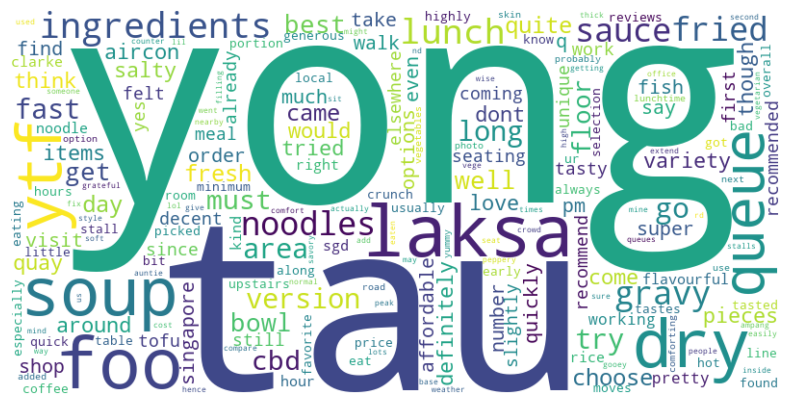

In [225]:
get_wordcloud(5, tokens)

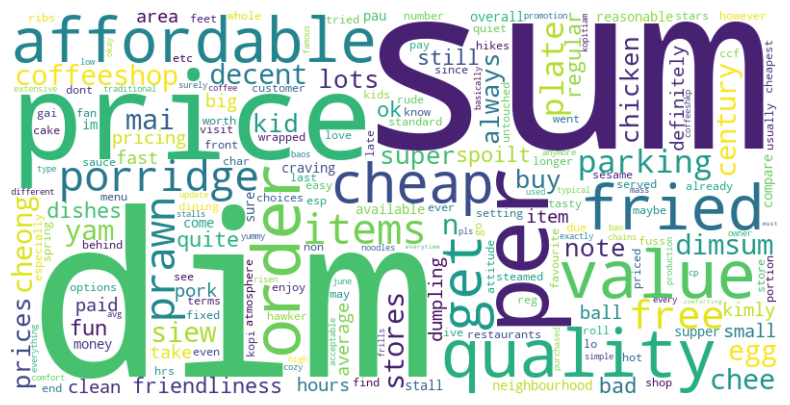

In [222]:
get_wordcloud(1, tokens)

In [123]:
combined_reviews.iloc[0]['review_text']

['Absolutely delicious Indian non-veg set with a very generous portion. Service was friendly, fast and efficient. Redeemed a MealPal lunch, super experience here   only restaurant so far with a QR code displayed prominently.',
 'The food was much better than I had before.  The curries were less spicy as I expected it to be a little more spicy. The naan I must say is probably one of the best I have had. Thin and chewy with a light crispy finish. Can be very packed during lunch time.',
 'Pretty good bistro bar',
 'Nice good food and good vibe.',
 'Good food, excellent vibe, reasonable prices, friendly service.',
 'Had a great evening with friends, friendly staff and tasty food.',
 'the Ideal place for a good Indian lunch set in CBD. Value for money and taste.',
 'Reasonably priced meals and drinks make it an excellent venue for social gatherings. From 12 p.m. till midnight, happy hours are in effect  To give you an idea of the prices, ,as of March 2024, a pint of Sapporo costs $12, while

## Ignore below

In [90]:
frequency = Counter(combined_reviews.iloc[0]['review_text_processed'])
print(frequency)

Counter({'indian': 10, 'options': 8, 'excellent': 6, 'vegetarian': 6, 'lunch': 5, 'tasty': 5, 'best': 4, 'drinks': 4, 'chicken': 4, 'masala': 4, 'quality': 4, 'veg': 3, 'super': 3, 'vibe': 3, 'reasonable': 3, 'high': 3, 'rice': 3, 'boat': 3, 'quay': 3, 'singapore': 3, 'work': 3, 'non': 2, 'set': 2, 'portion': 2, 'fast': 2, 'far': 2, 'better': 2, 'spicy': 2, 'naan': 2, 'must': 2, 'bar': 2, 'prices': 2, 'evening': 2, 'friends': 2, 'value': 2, 'money': 2, 'reasonably': 2, 'priced': 2, 'menu': 2, 'variety': 2, 'awesome': 2, 'specially': 2, 'lots': 2, 'well': 2, 'parking': 2, 'street': 2, 'get': 2, 'plate': 2, 'serve': 2, 'beer': 2, 'ever': 2, 'times': 2, 'snacks': 2, 'even': 2, 'hygiene': 2, 'tikka': 2, 'us': 2, 'price': 2, 'absolutely': 1, 'generous': 1, 'efficient': 1, 'redeemed': 1, 'mealpal': 1, 'qr': 1, 'code': 1, 'displayed': 1, 'prominently': 1, 'much': 1, 'curries': 1, 'less': 1, 'expected': 1, 'little': 1, 'say': 1, 'probably': 1, 'thin': 1, 'chewy': 1, 'light': 1, 'crispy': 1, 'f

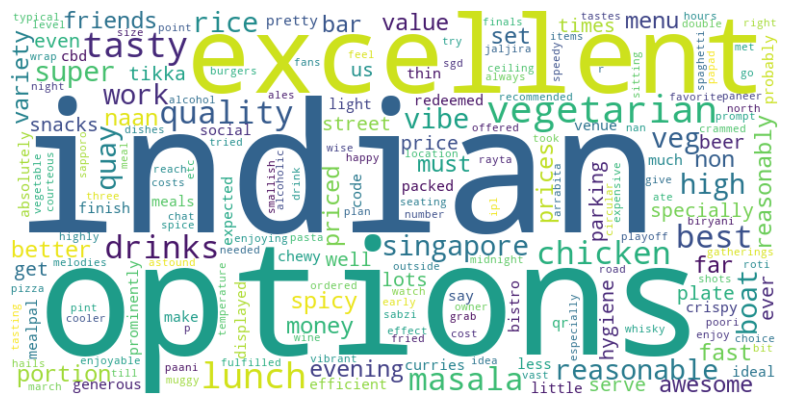

In [92]:
# Convert the Counter object to a dictionary for WordCloud
word_freq = dict(frequency)
# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()